In [1]:
"""
Inference & Representation HW3
Question 2 PCA and Non-negative matrix factorization.

"""

"""
Tools for loading the MNIST Data.
From Optimization Based Data Analysis HW1
@author: Brett
"""
import numpy as np
from mnist_tools import *
from plot_tools import *
import matplotlib.pyplot as plt

"""
Given train (in the format returned by load_train_data in mnist_tools), 
and a 1d numpy array testImage you should return a tuple (digit,imageIdx).  digit is
an integer giving the numerical digit value of the training image closest 
to the testImage in Euclidean distance.  imageIdx is the row number of the closest 
training image in the 2d array train[digit].
"""

"""
Assumes the data file is in 'mnist_all.mat'.
"""

datafile = "mnist_all.mat" #Change if you put the file in a different path
train = load_train_data(datafile)

trainarr=np.asarray(train)
trainarr = np.reshape(trainarr, (trainarr.shape[0]*trainarr.shape[1],-1))
trainarr = trainarr.astype(float)
trainarr=trainarr-trainarr.mean(axis=0)


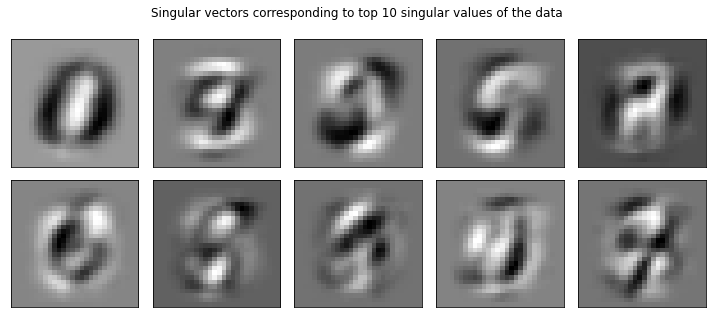

In [2]:
"""
Plot of the singular vectors corresponding 
to top 10 singular values of the data.
@author: Vlad 
"""
U, s, V = np.linalg.svd(trainarr, full_matrices=True)
n=10
imgs = [V[i,:] for i in range(n)]
plot_image_grid(imgs,"Singular vectors corresponding to top 10 singular values of the data")


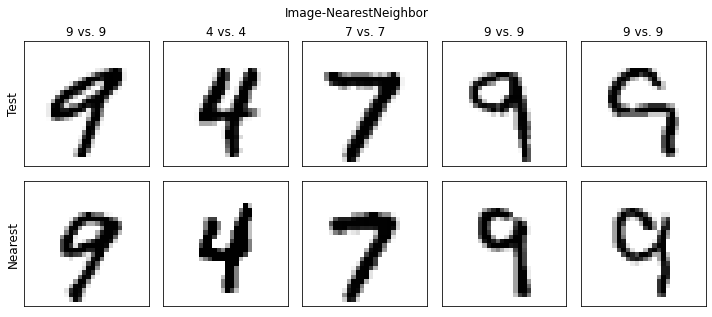

In [3]:
"""
Plot of the results of the nearest neighbour test applied 
to a principal component projection.
@author: Vlad 
"""

def project(V, Images) :
     return np.dot(V.T, np.dot(V, Images))
    
def compute_nearest_neighbors(train, testImage, V) :
    train=[np.array(i, dtype=float) for i in train]
    testImage= np.array(testImage, dtype=float)
    digit=0
    imageIdx=0
    dist=np.linalg.norm (project (V, train[digit][imageIdx])-project (V, testImage))
    for i in range(len(train)):
        for j in range (train[i].shape[0]):
            tempDist=np.linalg.norm (project(V,train[i][j])-project(V, testImage))
            if tempDist<dist:
                digit=i
                imageIdx =j
                dist= tempDist
    return digit, imageIdx 

n=8
U, s, V = np.linalg.svd(trainarr, full_matrices=False)
V=V[0:n,:]


test,testLabels = load_test_data(datafile)


imgs = []
TestLabels = []
for i in range(len(testLabels)) :
    trueDigit = testLabels[i]
    testImage = test[i]
    (nnDig,nnIdx) = compute_nearest_neighbors(train,testImage,V)
    imgs.extend( [testImage,train[nnDig][nnIdx,:]] )
    TestLabels.append(nnDig)

row_titles = ['Test','Nearest']
col_titles = ['%d vs. %d'%(i,j) for i,j in zip(testLabels,testLabels)]
plot_image_grid(imgs,
                    "Image-NearestNeighbor",
                    (28,28),len(testLabels),2,True,row_titles=row_titles,col_titles=col_titles)


In [70]:
# NMF for matrix factorization 
# inputs: 
# X: matrix to be factorized,  r: number of components
def NMF(X, r):
    # tolerance
    tol = 1e-4
    # error
    e = 1
    # maximum iteration 
    maxit = 1e4
    # counter
    n = 1
    # initialization
    row_dim, col_dim = np.shape(X)
    W0 = np.random.rand(row_dim, r)
    H0 = np.random.rand(r, col_dim)
    while (e>tol) & (n<maxit):
        # update for H
        # details can be found in the pdf file, we omit the commments
        WH = np.matmul(W0,H0)
        # add some perturbation to avoid zero 
        XWH = np.divide(X,WH+1e-6)
        H_numerator = np.matmul(W0.T, XWH)
        W_sum = np.sum(W0,axis=0).reshape(r,1)
        H_denominator = np.matmul(W_sum,np.ones((1,col_dim)))
        H_frac = np.divide(H_numerator, H_denominator+1e-6)
        H1 = np.multiply(H0, H_frac)
        # update for W
        WH = np.matmul(W0,H1)
        XWH = np.divide(X,WH+1e-6)
        W_numerator = np.matmul(XWH,H1.T)
        H_sum = np.sum(H1,axis=1).reshape((1,r))
        W_denominator = np.matmul(np.ones((row_dim,1)),H_sum)
        W_frac = np.divide(W_numerator, W_denominator+1e-6)
        W1 = np.multiply(W0, W_frac)
        # compute error
        e= max(np.linalg.norm(W0-W1), np.linalg.norm(H0-H1))
        #
        W0 = W1
        H0 = H1
        n += 1
    
    return W1, H1

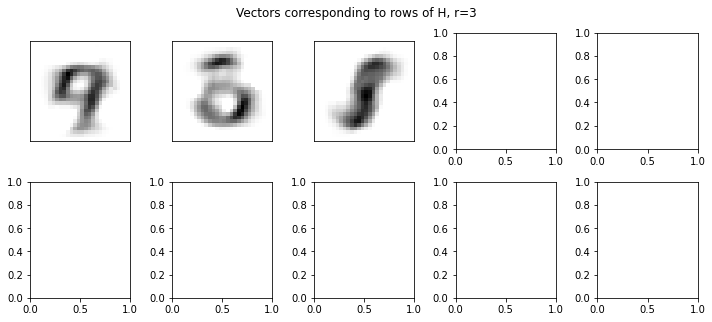

In [74]:
# we implement the NMF 
trainarr_nmf=np.asarray(train)
trainarr_nmf = np.reshape(trainarr_nmf, (trainarr_nmf.shape[0]*trainarr_nmf.shape[1],-1))
trainarr_nmf = trainarr_nmf.astype(float)
r1 = 3
_, H1 = NMF(trainarr_nmf, r1)
imgs = [H1[i,:] for i in range(r1)]
plot_image_grid(imgs,"Vectors corresponding to rows of H, r=3")


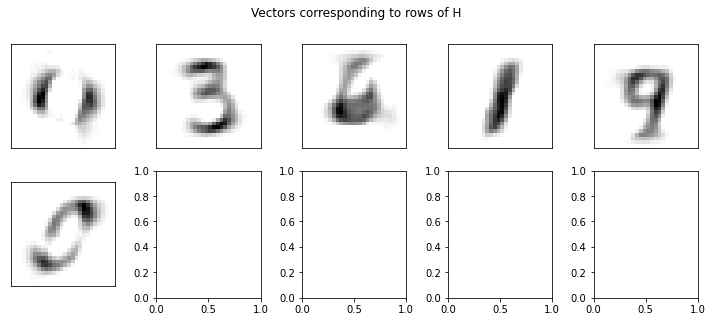

In [65]:
r2 = 6
_, H2 = NMF(trainarr_nmf, r2)
imgs = [H2[i,:] for i in range(r2)]
plot_image_grid(imgs,"Vectors corresponding to rows of H, r=6")


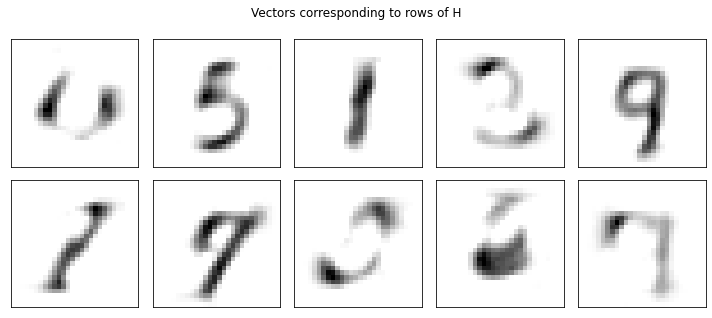

In [66]:
r3 = 10
_, H3 = NMF(trainarr_nmf, r3)
imgs = [H3[i,:] for i in range(r3)]
plot_image_grid(imgs,"Vectors corresponding to rows of H, r=10")


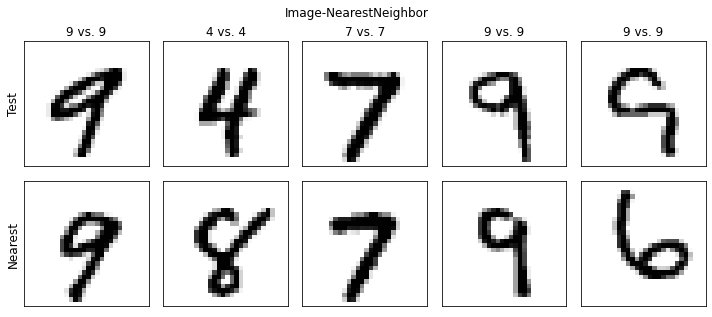

In [67]:
#we choose r=10 and we run the nearest neighbors
test,testLabels = load_test_data(datafile)


imgs = []
TestLabels = []
for i in range(len(testLabels)) :
    trueDigit = testLabels[i]
    testImage = test[i]
    (nnDig,nnIdx) = compute_nearest_neighbors(train,testImage,H3)
    imgs.extend( [testImage,train[nnDig][nnIdx,:]] )
    TestLabels.append(nnDig)

row_titles = ['Test','Nearest']
col_titles = ['%d vs. %d'%(i,j) for i,j in zip(testLabels,testLabels)]
plot_image_grid(imgs,
                    "Image-NearestNeighbor",
                    (28,28),len(testLabels),2,True,row_titles=row_titles,col_titles=col_titles)



## Comment
One obvious difference between the two is that NMF may return different results even though the data remains the same, since only local optimality is guaranteed, whereas PCA always gives the leading singular vectors.

On the other hand, we notice that factors produced by NMF is more "readable" in the sense that we can roughly see which parts of the numbers those factors try to capture. Put it in a more clear way, the features obtained by NMF is additive, representing different patterns in numbers and by combining them together (weighted combination), we are able to reconstruct the image. As for PCA, singular vectors reflect the property of the whole matrix, and so PCA outputs something that can represent the whole data. Hence, we cannot tell which part of which number those vectors try to capture, since they in fact highlight some features that are uniform and principal over all the data points.    